In [17]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [13]:
iris = load_iris()

x = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier( max_depth = 2)
tree_clf.fit( x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

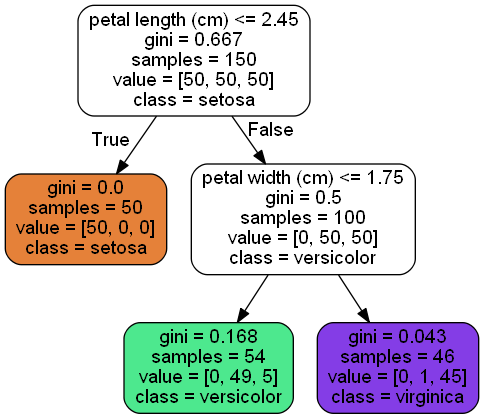

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree_clf,
                out_file = dot_data,
                feature_names = iris.feature_names[ 2:],
                class_names = iris.target_names,
                rounded = True,
                filled = True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


Image(graph.create_png())

In [15]:
y_pred = tree_clf.predict(x)

In [21]:
pd.DataFrame(confusion_matrix(y, y_pred))

,0,1,2
0,50,0,0
1,0,49,1
2,0,5,45


In [23]:
def precisao_total(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precisao_expecifica(label, confusion_matrix)
    return sum_of_precisions / rows

In [24]:
print("Precisão do algoritmo com profundidade 2: ", precisao_total(confusion_matrix(y, y_pred)))

Precisão do algoritmo com profundidade 2:  0.9618894256575415


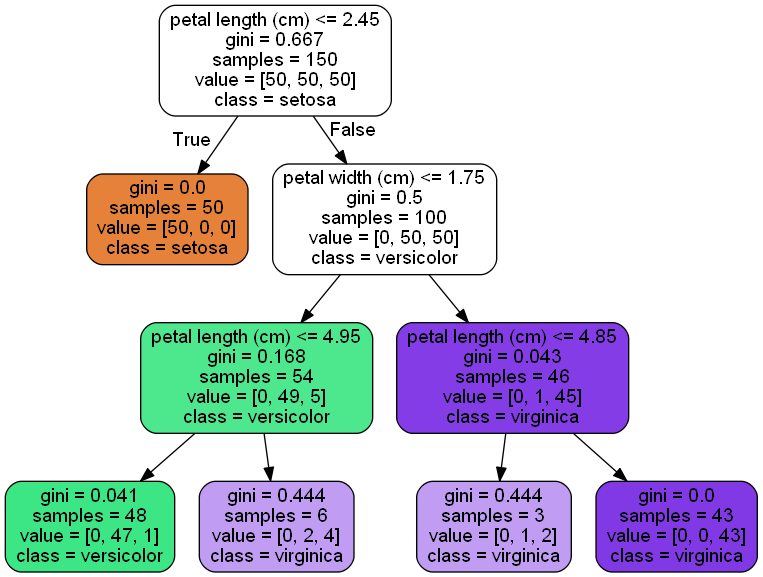

In [27]:
tree_clf_3 = DecisionTreeClassifier( max_depth = 3)
tree_clf_3.fit( x, y)

dot_data = StringIO()

export_graphviz(tree_clf_3,
                out_file = dot_data,
                feature_names = iris.feature_names[ 2:],
                class_names = iris.target_names,
                rounded = True,
                filled = True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


Image(graph.create_png())

In [28]:
y_pred_3 = tree_clf_3.predict(x)

pd.DataFrame(confusion_matrix(y, y_pred_3))

,0,1,2
0,50,0,0
1,0,47,3
2,0,1,49


In [29]:
print("Precisão do algoritmo com profundidade 2: ", precisao_total(confusion_matrix(y, y_pred_3)))

Precisão do algoritmo com profundidade 2:  0.9738247863247862
